### Importing important libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

## Microtask 1- Data Collection

### Importing the training data

In [27]:
data = pd.read_csv('flights.csv',low_memory=False)
data.shape

(5819079, 31)

In [28]:
sample_data = data.iloc[:100000,:]

In [29]:
sample_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


**Assessment Question. How many flights got diverted in the sample dataset?**

In [30]:
sample_data.DIVERTED.value_counts()

0    99776
1      224
Name: DIVERTED, dtype: int64

In [31]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

## Microtask 2- Exploratory Data Analysis

### Checking the data for number of null values in each feature

In [32]:
sample_data.isna().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              167
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          2298
DEPARTURE_DELAY         2298
TAXI_OUT                2371
WHEELS_OFF              2371
SCHEDULED_TIME             0
ELAPSED_TIME            2613
AIR_TIME                2613
DISTANCE                   0
WHEELS_ON               2440
TAXI_IN                 2440
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            2440
ARRIVAL_DELAY           2613
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    97611
AIR_SYSTEM_DELAY       65375
SECURITY_DELAY         65375
AIRLINE_DELAY          65375
LATE_AIRCRAFT_DELAY    65375
WEATHER_DELAY          65375
dtype: int64

### Making a correlation plot between features

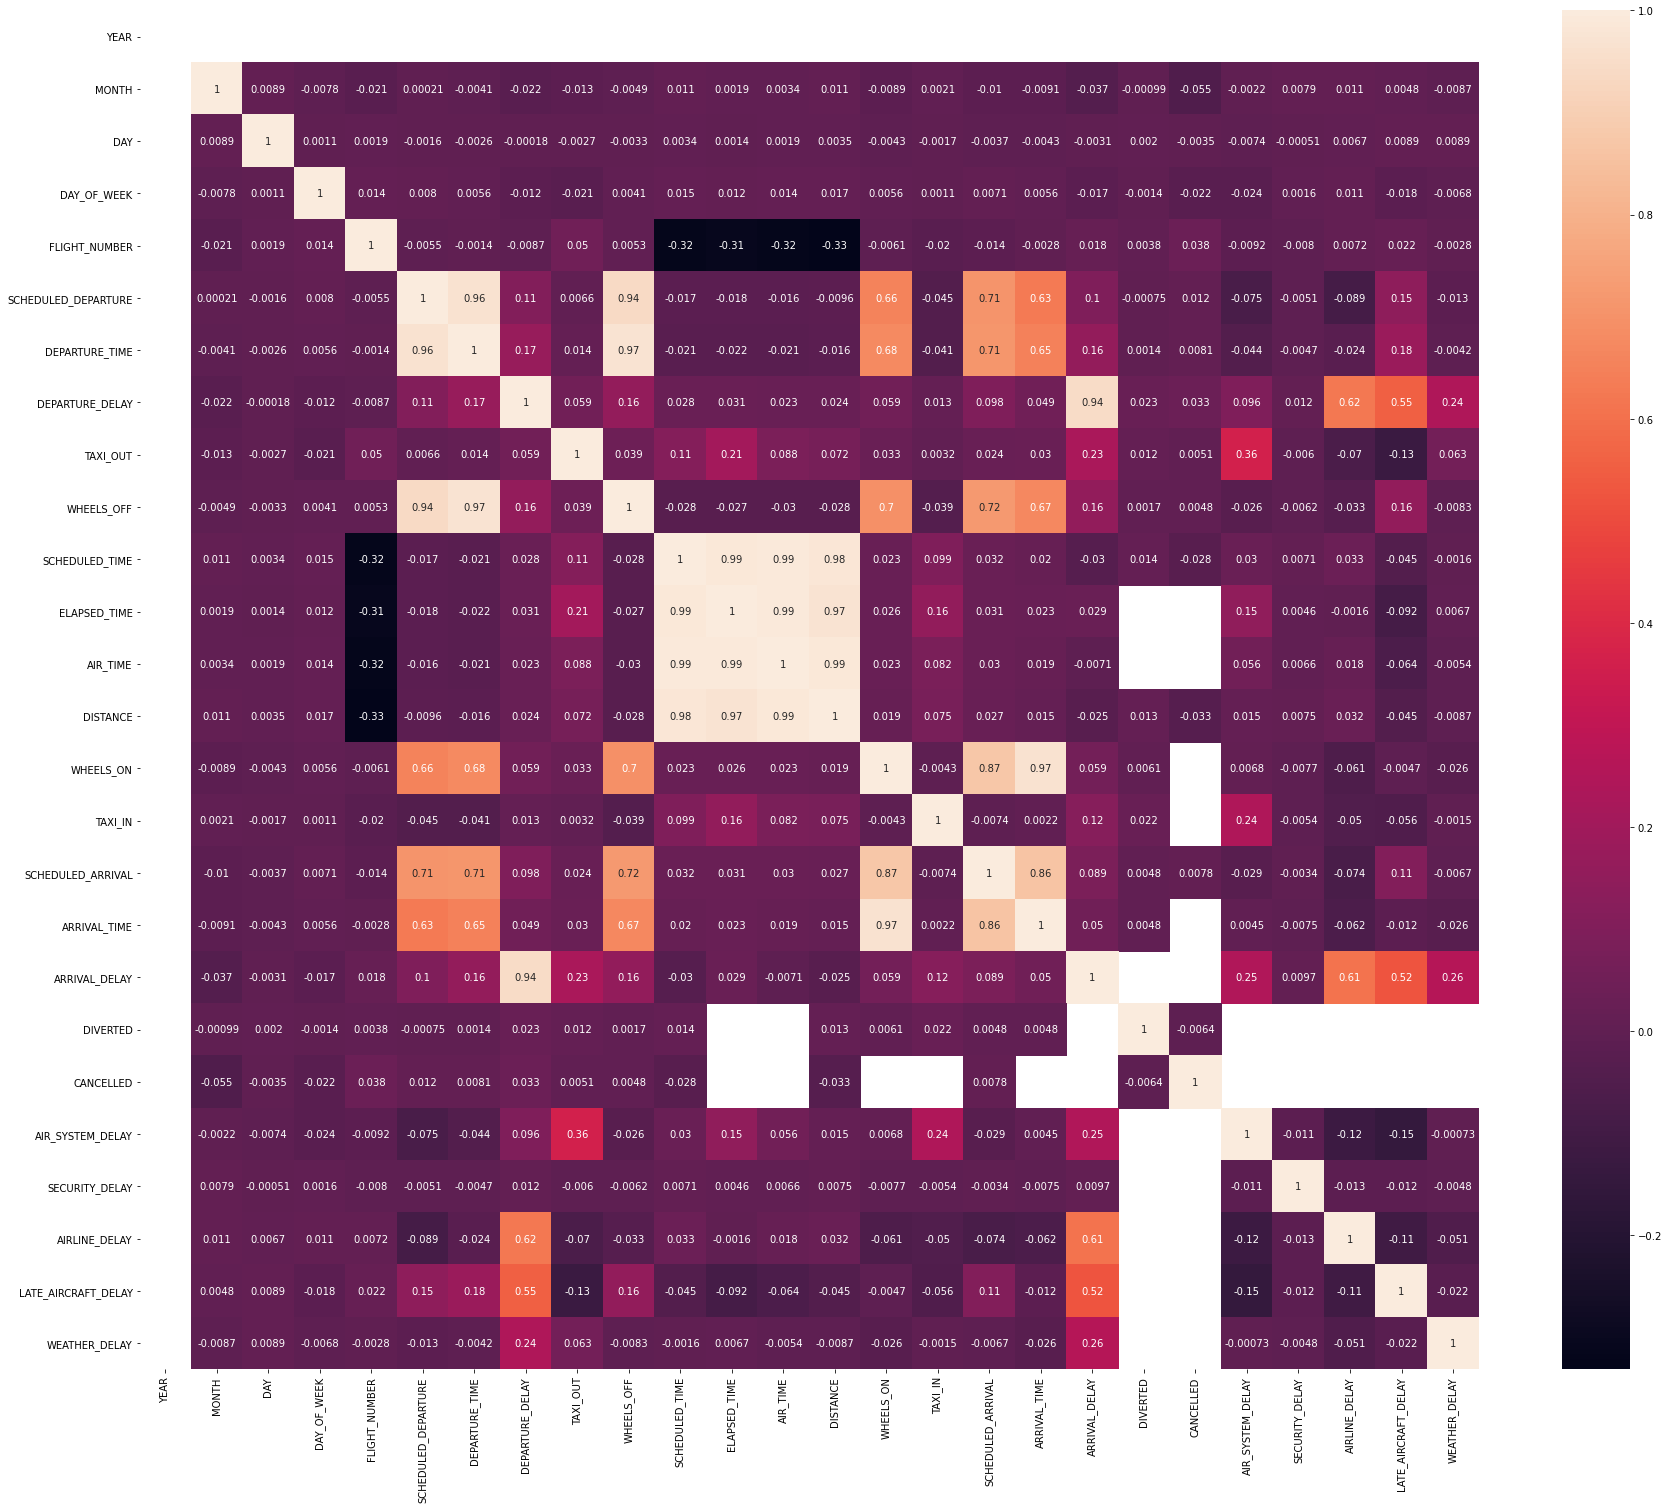

In [33]:
plt.figure(figsize=(30,25))
sns.heatmap(data.corr(),annot=True)
plt.show()

By observing the correlation plot we can notice there are features which are irrelevant and will play no role in flight delay prediction, we need to drop those features.

## Microtask 3 - Data Cleaning and Preprocessing

In [34]:
sample_data.drop(['YEAR','DAY_OF_WEEK','AIRLINE','FLIGHT_NUMBER','TAIL_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_TIME',
                  'TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME',
                 'CANCELLATION_REASON'],axis=1,inplace=True)

In [35]:
sample_data.shape

(100000, 14)

In [36]:
sample_data.isna().sum()

MONTH                      0
DAY                        0
SCHEDULED_DEPARTURE        0
DEPARTURE_DELAY         2298
DISTANCE                   0
SCHEDULED_ARRIVAL          0
ARRIVAL_DELAY           2613
DIVERTED                   0
CANCELLED                  0
AIR_SYSTEM_DELAY       65375
SECURITY_DELAY         65375
AIRLINE_DELAY          65375
LATE_AIRCRAFT_DELAY    65375
WEATHER_DELAY          65375
dtype: int64

We can still observe there are a lot of features which have NaN values. So, we need to remove these NaN values. So, I'm filling all the rows having null values with the mean of respective columns.

In [37]:
sample_data.fillna(sample_data.mean(),inplace=True)

### Making a new feature in the dataset which will be our dependent feature

In [38]:
result=[]
for i in range(sample_data.shape[0]):
    if sample_data['ARRIVAL_DELAY'][i] > 15:
        result.append(1)
    else:
        result.append(0)

sample_data['RESULT'] = result

**Assessment Question. How many flights got delayed by more than 15 minutes of ARRIVAL_TIME?**

In [39]:
sample_data['RESULT'].value_counts()

0    63779
1    36221
Name: RESULT, dtype: int64

**Answer:** 36221

In [40]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                100000 non-null  int64  
 1   DAY                  100000 non-null  int64  
 2   SCHEDULED_DEPARTURE  100000 non-null  int64  
 3   DEPARTURE_DELAY      100000 non-null  float64
 4   DISTANCE             100000 non-null  int64  
 5   SCHEDULED_ARRIVAL    100000 non-null  int64  
 6   ARRIVAL_DELAY        100000 non-null  float64
 7   DIVERTED             100000 non-null  int64  
 8   CANCELLED            100000 non-null  int64  
 9   AIR_SYSTEM_DELAY     100000 non-null  float64
 10  SECURITY_DELAY       100000 non-null  float64
 11  AIRLINE_DELAY        100000 non-null  float64
 12  LATE_AIRCRAFT_DELAY  100000 non-null  float64
 13  WEATHER_DELAY        100000 non-null  float64
 14  RESULT               100000 non-null  int64  
dtypes: float64(7), int

## Microtask 4 -  Model Creation

### Dividing the dataset into dependent and independent set

In [41]:
sample_data.drop(['DISTANCE','ARRIVAL_DELAY'],axis=1,inplace=True)

In [42]:
sample_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,RESULT
0,1,1,5,-11.0,430,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
1,1,1,10,-8.0,750,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
2,1,1,20,-2.0,806,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
3,1,1,20,-5.0,805,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
4,1,1,25,-1.0,320,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,1108,-6.0,1219,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99996,1,7,1108,9.0,1842,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99997,1,7,1108,-7.0,1225,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99998,1,7,1109,7.0,1454,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0


In [43]:
X = sample_data.iloc[:,:-1]
Y = sample_data.iloc[:,-1]

print(X.shape,Y.shape)

(100000, 12) (100000,)


### Dividing the data for training and evaluation

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X.values,Y.values,test_size=0.3,random_state=42)

### Feature Scaling

In [45]:
std = StandardScaler().fit_transform(X_train,X_test)

In [46]:
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [51]:
predictions = clf.predict(X_test)

## Microtask 5 - Model Prediction

In [52]:
from sklearn.metrics import roc_auc_score

In [53]:
print('Performance of our model on train set is: ',clf.score(X_train,Y_train))
print('Performance of our model on test set is: ',clf.score(X_test,Y_test))

Performance of our model on train set is:  1.0
Performance of our model on test set is:  0.9981666666666666


In [54]:
score = roc_auc_score(Y_test,predictions)
print('ROC-AUC score of our model is: ',score)

ROC-AUC score of our model is:  0.9978661159124105
